<a href="https://colab.research.google.com/github/logkong/class2023spring/blob/main/sound_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

In [ ]:
# parameter setting 사인웨이브 상태 설정
amp = 1          # range [0.0, 1.0] 진폭
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 200.0     # sine frequency, Hz # 중요
phase = 0  # phase, radian

In [ ]:
# generate sample ticks 샘플(숫자) 갯수를 미리 만듬.
nSamp = sr * dur # 1초동안 만개 간다는 뜻이니까, 0.5초 동안 쓸 샘플은 5천개만 필요하다
samples = np.arange(1, nSamp+1) # numpy.aragnge(a,b) -> a부터 b-1까지 정수를 생성한다

In [ ]:
# convert sample to time (sec) 샘플 당 시간을 할당해주는 것. 맨 첫번째 샘플의 시간은 1/10000초일거고, 맨 마지막 샘플의 시간은 0.5초일것이다
t = samples/sr # 시험문제를 내자면.. t의 첫 element는 무엇인가

In [ ]:
# convert time to angle (radian) # 시간 당 각도(radian)를 만들어줌. numpy.sin()은 radian 값만 받기 때문이다.
theta0 = t * 2*np.pi * freq # numpy.pi -> 파이. 360도는 2파이radian이다. 파장 한번이 360도이다.

In [ ]:
# shift angle by phase 사인곡선 시작 위치를 바꿔줌 (여기선 크게 의미없음)
theta = theta0 + phase

In [ ]:
# generate signal by sin-phasor 
s = amp * np.sin(theta) # numpy.sin(a) a가 사인곡선 함수 안으로 들어감

Text(0, 0.5, 'real')

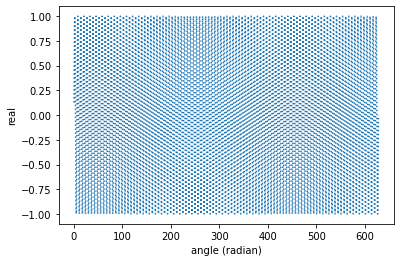

In [ ]:
# plot the entire signal
plt.plot(theta, s, ':') # matplotlib.plot(a,b,c) -> a는 x축의 값, b는 y 축의 값, c는 그냥 점으로 그리라는 명령
plt.xlabel('angle (radian)')
plt.ylabel('real')

Text(0, 0.5, 'real')

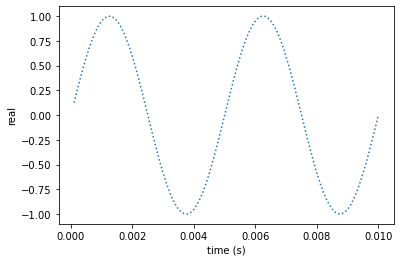

In [ ]:
# plot a certain portion of signals # 그냥 실행하면 너무 빽빽하니까 일부만 보자
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':') # 앞에서부터 100개만 보겠다
plt.xlabel('time (s)')
plt.ylabel('real')

In [ ]:
ipd.Audio(s, rate=sr) # IPython.display.Audio(a,rate=b) -> a는 사인곡선 함수 담긴 변수, rate=b는 샘플링 레이트. 소리를 만든다

In [ ]:
def phasor_sine(amp, sr, dur, freq, phase): # 여기까지의 과정을 함수로 만들어서 앞으로 편하게 쓰겠다
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 110; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)
-복소수

In [ ]:
#신호: 시간의 변화. time series, time function..존재하는 모든 신호는 사인곡선의 합으로 표현할 수 있다. (푸리에 변환)

# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [ ]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [ ]:
# convert samples to time
t = samples/sr

In [ ]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [ ]:
# shift angle by phase
theta = theta0 + phase

In [ ]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j) #numpy.exp = e. 1j=i랑 똑같다고 보면 된다.

In [ ]:
# plot the entire signal 예쁘게 적으려고 좀 복잡함
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
# plot a certain portion of signals 일부만 보여줌
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [ ]:
ipd.Audio(c, rate=sr) #복소수(b)파트를 소리로 만들수 없어서 자동으로 탈락시킴

/usr/local/lib/python3.9/dist-packages/IPython/lib/display.py:158: ComplexWarning:

Casting complex values to real discards the imaginary part



In [ ]:
def phasor_complex(amp, sr, dur, freq, phase): 
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0 #그래도 정확하게 하기 위해 복소수 부분은 탈락시킴
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.real, rate=sr)